# Introduction to pandas

[pandas](https://pandas.pydata.org/docs/) is a Python package for working with structured datasets, e.g. it is perfectly suited for observational/statistical datasets, having many similarities with Excel spreadsheets.

## Key features
- easy handling of missing data
- columns can be inserted and deleted from loaded data sets (size mutability)
- data can be automatically or explicitly aligned to a set of labels (data alignment)
- group by functionality to perform split-apply-combine operations on data sets
- easy to convert ragged, differently-indexed data in other Python and NumPy data structures into pandas objects
- intelligent label-based slicing, fancy indexing, and subsetting of large data sets
- intuitive merging and joining data sets
- flexible reshaping and pivoting of data sets
- hierarchical labeling of axes (possible to have multiple labels per tick)
- robust I/O (Input/Output) tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving/loading data from the ultrafast HDF5 format
- time series - specific functionalities

pandas is built on top of [`numpy`](https://numpy.org/doc/stable/index.html) and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

The community standard to import pandas is to use `pd` alias:

In [54]:
import pandas as pd

# Import other useful modules
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Primary data structures of pandas

### Series

Series is a 1-dimensional numpy array with axis labels. Can be created with a dictionary:

In [55]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d, index=['a', 'b', 'c'])
print(ser)

a    1
b    2
c    3
dtype: int64


### DataFrame 

DataFrame is a 2-dimensional tabular data. Similarly, can be created with a dictionary:

In [56]:
d = {'temperature': [31.5, 32.5], 'pressure': [100.0, 200.0]}
df = pd.DataFrame(data=d)
print(df)

   temperature  pressure
0         31.5     100.0
1         32.5     200.0


## Loading data

The following cell finds the path to the data on your system so we can read it in:

In [57]:
from pathlib import Path # A module for dealing with paths that is operating system agnostic
notebook_dir = Path.cwd() # Get the current working directory
base_dir = notebook_dir.parent.absolute() # Get the parent directory (folder that contains our working directory)
data_dir = base_dir / 'data'# Get diretory where the data is stored
fname = data_dir / 'ship_ctd_short.csv'

Data from a `.csv` file can be loaded using [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. For other data formats, check how to load them [here](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

In [58]:
ctd_data = pd.read_csv(fname)

Let's interrogate `ctd_data` variable:

In [59]:
type(ctd_data)

pandas.core.frame.DataFrame

In [60]:
# View just the top of data
ctd_data.head(6)

,Depth,Temperature,Oxygen,Irradiance,Salinity
0,0.5,16.5080,5.83945,60.4,35.7685
1,1.0,16.5315,5.85881,57.0,35.7679
2,1.5,16.5183,5.88355,53.0,35.7681
3,2.0,16.4921,5.87417,51.3,35.7685
4,2.5,16.4626,5.86818,50.3,35.7688
5,3.0,16.4265,5.87387,50.0,35.7691


In [61]:
# Find shape of the data
print(ctd_data.shape)

(1180, 5)


In [62]:
# Find data type in each column
print(ctd_data.dtypes)

Depth          float64
Temperature    float64
Oxygen         float64
Irradiance     float64
Salinity       float64
dtype: object


In [63]:
# View the last rows of data
# Note the optional argument for number of rows (available for head() too)
ctd_data.tail(n=2) 

,Depth,Temperature,Oxygen,Irradiance,Salinity
1178,589.5,11.6760,3.99465,1.000000e-12,35.9688
1179,590.0,11.6765,3.99631,1.000000e-12,35.9686


Get descriptors for the **vertical** axis (rows):

In [64]:
print(ctd_data.index)

RangeIndex(start=0, stop=1180, step=1)


Get descriptors for the **horizontal** axis (columns):

In [65]:
print(ctd_data.columns)

Index(['Depth', 'Temperature', 'Oxygen', 'Irradiance', 'Salinity'], dtype='object')


Get general information at once including memory usage:

In [66]:
ctd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Depth        1180 non-null   float64
 1   Temperature  1180 non-null   float64
 2   Oxygen       1180 non-null   float64
 3   Irradiance   1180 non-null   float64
 4   Salinity     1180 non-null   float64
dtypes: float64(5)
memory usage: 46.2 KB


## Extracting a column

A pandas `Series` can be extracted from a `DataFrame` using one of its columns:

In [67]:
temp = ctd_data['Temperature']

Some of its attributes:

In [68]:
print(type(temp))
print(temp.dtype)
print(temp.shape)
print(temp.nbytes)

<class 'pandas.core.series.Series'>
float64
(1180,)
9440


In [69]:
print(temp)

0       16.5080
1       16.5315
2       16.5183
3       16.4921
4       16.4626
         ...   
1175    11.6755
1176    11.6757
1177    11.6758
1178    11.6760
1179    11.6765
Name: Temperature, Length: 1180, dtype: float64


Note it has both the index and data coloumn, but the shape is still only 1D. The index is more like a coordinate rather than data in itself.

## Numpy as pandas' backend

It is always possible to fall back to a `numpy` array to pass on to scientific libraries that need them: SciPy, scikit-learn, etc:

In [70]:
print(ctd_data['Temperature'].values)
print("ctd_data is a", type(ctd_data['Temperature'].values))

[16.508  16.5315 16.5183 ... 11.6758 11.676  11.6765]
ctd_data is a <class 'numpy.ndarray'>


## Cleaning data

<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">The truth about data science: cleaning your data is 90% of the work. Fitting the model is easy. Interpreting the results is the other 90%.</p>&mdash; Jake VanderPlas (@jakevdp) <a href="https://twitter.com/jakevdp/status/742406386525446144">June 13, 2016</a></blockquote>
<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>

### Renaming columns

Column names in our data don't have any units:

In [71]:
list(ctd_data)

['Depth', 'Temperature', 'Oxygen', 'Irradiance', 'Salinity']

If we know the units of the variables, we can rename the columns to include these units. This is especailly useful if you plan to carry out unit conversions later:

In [72]:
ctd_data.columns = ['Depth_m', 'Temperature_C', 'Oxygen_ml/l', 'Irradiance', 'Salinity_psu']
ctd_data.columns

Index(['Depth_m', 'Temperature_C', 'Oxygen_ml/l', 'Irradiance',
       'Salinity_psu'],
      dtype='object')

Note the use of underscores `_` in the renaming. It may not be pretty, but putting spaces in variable names will cause problems later on in your processing.

### Deleting columns

Let's drop Irradiance collumn from the data frame:

In [73]:
ctd_data = ctd_data.drop('Irradiance', 1)

In [74]:
ctd_data.head()

,Depth_m,Temperature_C,Oxygen_ml/l,Salinity_psu
0,0.5,16.5080,5.83945,35.7685
1,1.0,16.5315,5.85881,35.7679
2,1.5,16.5183,5.88355,35.7681
3,2.0,16.4921,5.87417,35.7685
4,2.5,16.4626,5.86818,35.7688


### Changing index
It would make more sense to have Depth column as the index, as the other variables are expected to vary with depth.

In [75]:
ctd_data.set_index('Depth_m', inplace=True)
ctd_data

,Temperature_C,Oxygen_ml/l,Salinity_psu
Depth_m,,,
0.5,16.5080,5.83945,35.7685
1.0,16.5315,5.85881,35.7679
1.5,16.5183,5.88355,35.7681
2.0,16.4921,5.87417,35.7685
2.5,16.4626,5.86818,35.7688
...,...,...,...
588.0,11.6755,3.99643,35.9688
588.5,11.6757,3.99618,35.9689
589.0,11.6758,3.99506,35.9689


## Basic visualisation

Try calling `plot()` method of the `ctd_data` object:

<AxesSubplot:xlabel='Depth_m'>

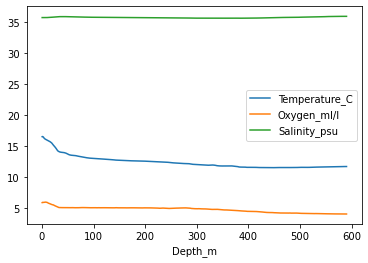

In [76]:
ctd_data.plot()

We can explicitly pass nicer labels to legend if needed:

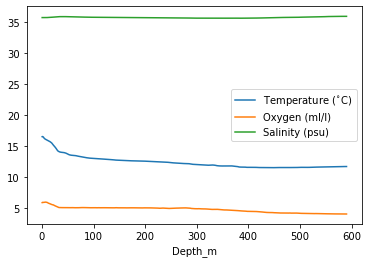

In [77]:
df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
ax = ctd_data.plot()
ax.legend(["Temperature $\mathrm{(^{\circ}C}$)", "Oxygen (ml/l)", "Salinity (psu)"]);

What happens if we pass `subplots=True` as an argument of the `plot()` method?

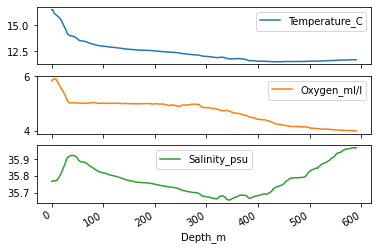

In [106]:
axes = ctd_data.plot(subplots=True)

It is easy to create other useful plots using `DataFrame`:

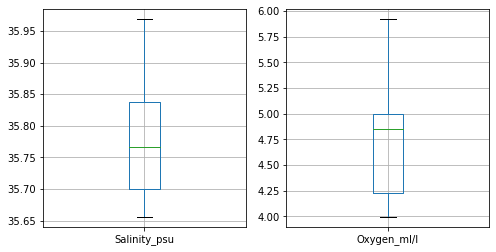

In [79]:
# Use matplotlib to initialise your figure with 2 subplots
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8,4))

# Make boxplots with specific columns in each subplot
ctd_data.boxplot(ax=ax0, column=['Salinity_psu'])
ctd_data.boxplot(ax=ax1, column=['Oxygen_ml/l'])

plt.show()

More options for visualisation can be looked at [the pandas website](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

## Exporting data

One of pandas best features is how it simplifies writing text to a `.csv` (comma seperated value) text file that can be read easily by programs like Excel:

In [80]:
ctd_data.to_csv(data_dir/'ship_ctd_short_clean.csv', index=True, header=True)

## Statistics

You can print a summary of main statistics for the whole DataFrame:

In [81]:
ctd_data.describe()

,Temperature_C,Oxygen_ml/l,Salinity_psu
count,1180.000000,1180.000000,1180.000000
mean,12.349396,4.694360,35.778409
std,1.003352,0.437966,0.086346
min,11.479900,3.994650,35.655600
25%,11.589050,4.226740,35.700775
50%,12.017850,4.856475,35.766950
75%,12.691925,4.999835,35.837650
max,16.531500,5.920030,35.968900


You can still call individual ones like in numpy, e.g.:

In [82]:
np.mean(ctd_data)

Temperature_C    12.349396
Oxygen_ml/l       4.694360
Salinity_psu     35.778409
dtype: float64

## Computing correlations

Both `Series` and `DataFrames` have a `corr()` method to compute the correlation coefficient.

If series are already grouped into a `DataFrame`, computing all correlation coefficients is trivial:

In [83]:
ctd_data.corr()

,Temperature_C,Oxygen_ml/l,Salinity_psu
Temperature_C,1.000000,0.833816,0.225029
Oxygen_ml/l,0.833816,1.000000,-0.239306
Salinity_psu,0.225029,-0.239306,1.000000


If you want to visualise this correlation matrix, uncomment the following code cell.

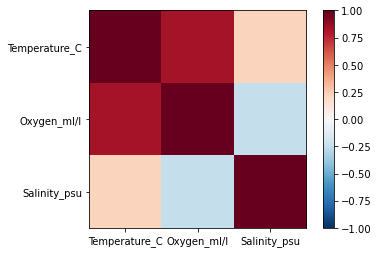

In [107]:
fig, ax = plt.subplots()
p = ax.imshow(ctd_data.corr(), interpolation="nearest", cmap='RdBu_r', vmin=-1, vmax=1)
ax.set_xticks(np.arange(len(ctd_data.corr().columns)))
ax.set_yticks(np.arange(len(ctd_data.corr().index)))
ax.set_xticklabels(ctd_data.corr().columns)
ax.set_yticklabels(ctd_data.corr().index)
fig.colorbar(p)
plt.show()

## Rolling operations

Pandas includes functionality to do [rolling means](https://en.wikipedia.org/wiki/Moving_average), sums, and more, given a specified window size. This is very useful for smoothing noisy data.

First we will create some noisy data from our dataset:

In [85]:
from numpy import random

In [86]:
noisy_data = ctd_data['Temperature_C']

# Randomise data to make it super noisy
noisy_data = noisy_data * 2*random.rand(len(noisy_data)) + noisy_data**2
print(noisy_data)

Depth_m
0.5      272.671579
1.0      291.661614
1.5      293.571950
2.0      298.344817
2.5      277.156181
            ...    
588.0    140.089273
588.5    140.584990
589.0    136.464098
589.5    149.560725
590.0    141.763840
Name: Temperature_C, Length: 1180, dtype: float64


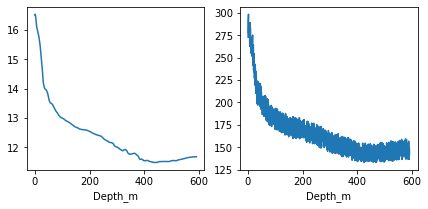

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(7,3))
ctd_data['Temperature_C'].plot(ax=ax[0])
noisy_data.plot(ax=ax[1])
plt.show()

In [88]:
noisy_roll = noisy_data.rolling(window=50)
noisy_roll

Rolling [window=50,center=False,axis=0]

In [89]:
noisy_roll.mean()

Depth_m
0.5             NaN
1.0             NaN
1.5             NaN
2.0             NaN
2.5             NaN
            ...    
588.0    147.345658
588.5    147.018515
589.0    146.664722
589.5    146.569556
590.0    146.413040
Name: Temperature_C, Length: 1180, dtype: float64

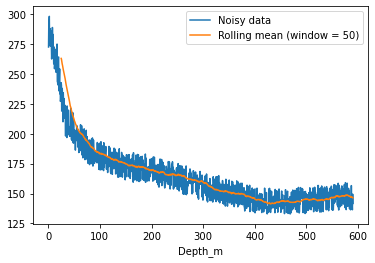

In [90]:
noisy_data.plot(label="Noisy data")
noisy_roll.mean().plot(label="Rolling mean (window = 50)")
plt.legend(loc="best")
plt.show()

There are other rolling functions, such as [`sum()`](https://pandas.pydata.org/docs/reference/api/pandas.core.window.rolling.Rolling.sum.html), and you can even use the [`win_type`](https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows) argument to use change the window type.

### Exercise 1

Create a new rolling object from the noisy data and apply the `win_type` argument, and explore the result. 

Two common types are `'triang'` and `'gaussian'`.

Note: for gaussian you'll have to specify a standard deviation argument (written as `std`) 
when you apply the `sum()` or `mean()` function afterwards. 

In [91]:
## your code goes here

## Creating DataFrames

`DataFrame` can be created manually, by grouping several `Series` together.

We will load two `Series` objects from two `.csv` files and combine them into a `DataFrame`.

Data are monthly values of:
* Southern Oscillation Index (SOI) - "a standardized index based on the observed sea level pressure differences between Tahiti and Darwin, Australia"
* Outgoing Longwave Radiation (OLR) - "a proxy for convective precipitation in the western equatorial Pacific"

Data were downloaded from [NOAA's website](https://www.ncdc.noaa.gov/teleconnections/).

In [92]:
soi_df = pd.read_csv('../data/soi.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))

olr_df = pd.read_csv('../data/olr.csv', skiprows=1, parse_dates=[0], index_col=0, na_values=-999.9,
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y%m'))

In [93]:
soi_df.head()

,Value
Date,
1951-01-01,1.5
1951-02-01,0.9
1951-03-01,-0.1
1951-04-01,-0.3
1951-05-01,-0.7


In [94]:
olr_df.head()

,Value
Date,
1974-06-01,1.1
1974-07-01,0.0
1974-08-01,1.0
1974-09-01,0.9
1974-10-01,1.1


In [95]:
df = pd.DataFrame({'OLR': olr_df.Value,
                   'SOI': soi_df.Value})

In [96]:
df.head()

,OLR,SOI
Date,,
1951-01-01,NaN,1.5
1951-02-01,NaN,0.9
1951-03-01,NaN,-0.1
1951-04-01,NaN,-0.3
1951-05-01,NaN,-0.7


Note that, although the data series do not overlap completely, we can combine them seamlesssly into a dataframe because `pandas` understands datetime objects as the index.

In [97]:
df.describe()

,OLR,SOI
count,551.000000,848.000000
mean,0.006534,0.131958
std,0.968012,0.935401
min,-2.800000,-3.600000
25%,-0.600000,-0.400000
50%,0.100000,0.100000
75%,0.700000,0.800000
max,2.300000,2.900000


# Groupby operations

Often, we want to calculate aggregated values across the values of a certain index or column. For example, we can quickly compute monthly averages across all the years in our dataframe as follows:

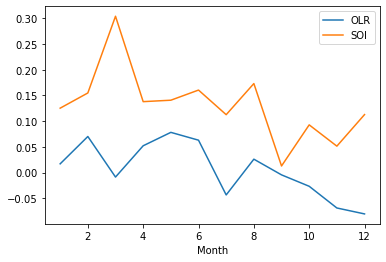

In [98]:
df_monthly_means = df.groupby(df.index.month).mean()

# Show the result on a plot
df_monthly_means.plot()
plt.xlabel('Month')
plt.show()

## Ordinary Least Square (OLS) regressions

### Numpy polynomial fitting

In [99]:
from numpy.polynomial import polynomial as P

In [100]:
x = df['OLR'].values
y = df['SOI'].values

In [101]:
idx = np.isfinite(x) & np.isfinite(y)

In [102]:
coefs, stats = P.polyfit(x[idx], y[idx], 1, full=True)

In [103]:
y2 = P.polyval(x, coefs)

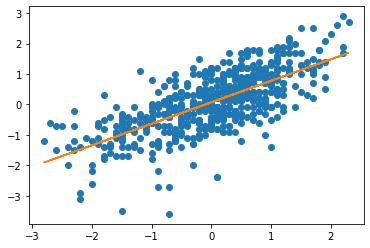

In [104]:
plt.plot(x, y, linestyle='', marker='o')
plt.plot(x, y2)
plt.show()

### Sklearn regression

In [105]:
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df = df.dropna()
x = df['OLR'].values.reshape(-1, 1)
y = df['SOI'].values.reshape(-1, 1)

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
y_pred = model.predict(x) 

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color="orange")
plt.show()

More examples: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

## Extra tutorials

Online tutorials with more in-depth operations used in pandas:

* [Kaggle tutorial](https://www.kaggle.com/learn/pandas)
* [Pandas official website Getting Started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)

## References
* https://github.com/jonathanrocher/pandas_tutorial
* https://github.com/koldunovn/python_for_geosciences
* http://pandas.pydata.org/pandas-docs/stable/index.html#module-pandas
* http://pandas.pydata.org/pandas-docs/stable/10min.html
* https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d